pip install pycaretのみだと各ライブラリの整合性が取れずエラーを出すことがあるため，Anacondaやpyenvなどの仮想環境上でpip install pycaret[full]を用いるのが最も良いと思います．KaggleのNotebook上でも同様の方法でインストールすることができます．  

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 96.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 110.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.0/372.0 KB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 33.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 103.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
import warnings

import numpy as np
import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from pycaret.regression import *

warnings.filterwarnings("ignore")

In [3]:
# データの読み込み
# 例としてscikit-learnで提供されているカリフォルニアの住宅価格データを用いる
data = datasets.fetch_california_housing()

X = data["data"]
y = data["target"]

# 見やすいようにDataFrameにする
df = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                  columns=data.feature_names+["price"])
display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Pycaret  
前回の記事でOptunaを用いたハイパーパラメータの最適化を紹介しました．ただ正直ここまでやったことを何回もコードにするのは手間ですし，コードも長くなってしまい読みづらくなってしまいます．

そこで非常に簡単に様々なモデルの比較を行い，パラメータの調整までしてくれるのがPycaretです．私自身非常にすごいと思ったのは，データの前処理をしなくても型から適切な前処理をしてくれるところです．実際はEDAを用いて数値型のものもカテゴリ変数として扱うなどの処理をすることもあるのですが，そのような細かい部分は気にせずにとにかくベースラインとなるようなモデルの学習をしてくれます．  

実際にPycaretを用いてモデルの学習をしてみます．  
まずはPycaretにデータを与えます．  

In [4]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=6174)
reg_model = setup(data=train_df, target="price", session_id=1)

,Description,Value
0,session_id,1
1,Target,price
2,Original Data,"(16512, 9)"
3,Missing Values,0
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(11558, 8)"


実行途中に入力を促すものが出てくるのですが，これは変数の扱いについて表でアルゴリズムが提案し，そのまま使用して良いかを聞いてきています．特に問題ない場合は何も入力せずにエンターを押せば先に進みます．  

前処理が終わるとまた大きな表がでてきます．これにどのような前処理や次元削減などを用いているかがまとめられています．今回の場合はめぼしいものはないですが，わかりやすいものとしてはデータの分割にはKFoldを用いており10分割されている，目的変数はbox-cox変換という非線形変換が施される，欠損値はないですが数値変数の欠損値を埋めるときは平均値を用いるなど様々な情報がまとめられています．

次に与えたモデルで様々なモデルを訓練し，その結果を比較します．このときに引数として"exclude"を指定することができるのですが，リストで予測に使用しない特徴量の名前を与えることができます．  

In [5]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2963,0.2032,0.4506,0.8473,0.1360,0.1659,2.1710
lightgbm,Light Gradient Boosting Machine,0.3148,0.2215,0.4706,0.8334,0.1424,0.1782,0.0260
xgboost,Extreme Gradient Boosting,0.3228,0.2332,0.4828,0.8246,0.1462,0.1806,39.3380
et,Extra Trees Regressor,0.3335,0.2572,0.5068,0.8068,0.1498,0.1867,0.1390
rf,Random Forest Regressor,0.3380,0.2649,0.5145,0.8008,0.1538,0.1923,0.3310
gbr,Gradient Boosting Regressor,0.3691,0.2846,0.5332,0.7859,0.1629,0.2120,0.1620
dt,Decision Tree Regressor,0.4702,0.5324,0.7288,0.5998,0.2150,0.2541,0.0100
ridge,Ridge Regression,0.5295,0.5459,0.7373,0.5884,0.2244,0.3193,0.0030
lr,Linear Regression,0.5295,0.5459,0.7373,0.5884,0.2244,0.3193,0.1710
br,Bayesian Ridge,0.5295,0.5460,0.7373,0.5884,0.2244,0.3193,0.0030


結果としてまた大きな表が出てきました．今回は様々なモデルを学習させ，様々な回帰問題に対する評価指標の結果をまとめたものになります．これにより各評価指標に対して最も性能が高いモデルがどれなのかを一発で知ることができます．ベースラインモデルの作成や，モデル改善のときにどのモデルを採用するかの参考になると考えられます．  

次に比較したモデルの中から単一のモデルについて見ていきます．今回は性能が良かったcatboostについて見ていきます．  

In [6]:
catboost = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2937,0.2048,0.4526,0.8457,0.1336,0.1603
1,0.3032,0.2047,0.4524,0.8430,0.1342,0.1599
2,0.2997,0.2036,0.4512,0.8539,0.1363,0.1623
3,0.2899,0.2004,0.4477,0.8402,0.1365,0.1663
4,0.2964,0.1983,0.4453,0.8499,0.1346,0.1620
5,0.3114,0.2292,0.4787,0.8387,0.1423,0.1753
6,0.2877,0.1845,0.4295,0.8512,0.1315,0.1600
7,0.2845,0.1873,0.4328,0.8596,0.1307,0.1609
8,0.2996,0.2028,0.4504,0.8561,0.1375,0.1788


この場合は10分割のKFoldを用いているため，各フォールドでの各評価指標をまとめられています．また各評価指標の平均と，分散が算出されます．各評価指標での汎化性能がどの程度になるのか，またデータによってどれだけばらつきがあるのかを見ることができます．  

create_modelでは各モデルのデフォルトパラメータでの学習が行われています．次にモデルのパラメータを調節してみましょう．これはtune_model関数を用いることで自動的にパラメータを調整してくれます．  

In [7]:
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3057,0.2141,0.4627,0.8387,0.1371,0.1686
1,0.3141,0.2149,0.4636,0.8351,0.1380,0.1676
2,0.3111,0.2128,0.4613,0.8473,0.1382,0.1691
3,0.3052,0.2176,0.4664,0.8265,0.1418,0.1750
4,0.3126,0.2153,0.4640,0.8370,0.1400,0.1725
5,0.3244,0.2443,0.4943,0.8280,0.1459,0.1815
6,0.3012,0.1971,0.4440,0.8410,0.1362,0.1694
7,0.2978,0.2022,0.4496,0.8484,0.1367,0.1729
8,0.3191,0.2256,0.4750,0.8399,0.1449,0.1926


パラメータを調整したはずなのに性能が低下しているのがすごく気になります．どのような指標で調整されているのかまでは今回は考えませんが，いくつかのモデルを実行して比較するのも良いかもしれません．  

調整後のパラメータをインスタンスから取得してみます．  

In [8]:
tuned_catboost.get_params()

{'depth': 9,
 'l2_leaf_reg': 5,
 'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'random_strength': 0.7,
 'task_type': 'CPU',
 'n_estimators': 150,
 'random_state': 1,
 'eta': 0.15}

ここまででも様々なモデルの比較，パラメータの調整を簡単に実行できるわけですが，さらにモデルを分析するためのプロットもすることが可能です．残差プロットや真の値と予測値のズレを可視化したり，特徴量重要度を可視化することができます．  

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


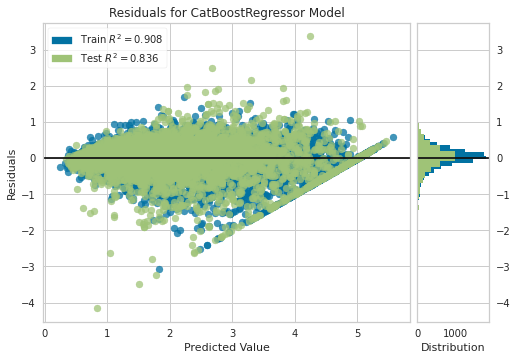

In [9]:
# 残差プロット
plot_model(tuned_catboost)

おそらくですが図中のbest fitは最小二乗誤差を用いた結果，identifyが学習したモデルによる結果を表しているのではないかと思います．  

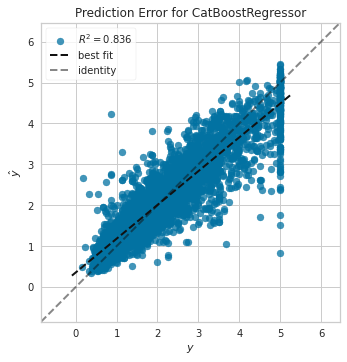

In [10]:
# 誤差をプロット
plot_model(tuned_catboost, plot="error")

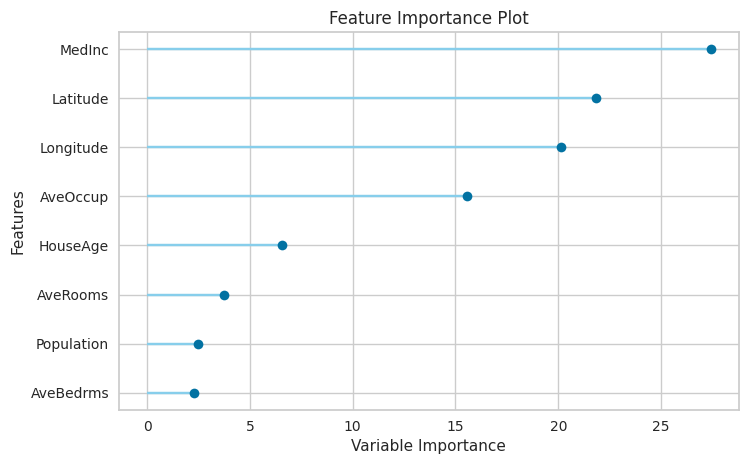

In [11]:
# 特徴量重要度
plot_model(tuned_catboost, plot="feature")

更にevaluate_model関数を用いることで，上記の可視化を含んだ様々なデータを表示することができます．可視化するものを選択できる形式になり，選択したものが可視化されるようになります．表示するものによっては多少処理に時間がかかりますが，モデルの分析として非常に有用でしょう．    

In [12]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

ここまでの学習などには最初にPycaretに与えたデータを訓練用と検証用で分割した中の訓練用データのみで処理していました．最後に検証用データに対するモデルの性能を見てみましょう．  

In [13]:
predict_model(tuned_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3116,0.2154,0.4641,0.8362,0.1412,0.1747


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,Label
0,4.4861,35.0,7.033149,1.160221,555.0,3.066298,38.279999,-122.209999,2.693,1.722256
1,4.3281,19.0,5.499289,1.102418,1554.0,2.210526,32.799999,-117.029999,2.200,2.081082
2,1.4103,52.0,3.749380,0.967742,901.0,2.235732,37.830002,-122.279999,1.039,1.444528
3,4.1917,26.0,5.435051,0.964948,1416.0,2.919588,35.770000,-119.230003,0.840,1.089909
4,6.7274,5.0,5.910931,0.964912,1913.0,2.581646,33.840000,-117.769997,2.664,2.795513
...,...,...,...,...,...,...,...,...,...,...
4949,6.5338,13.0,6.626566,1.057644,1197.0,3.000000,33.099998,-117.279999,2.679,3.188884
4950,1.4432,27.0,4.902913,1.158576,1178.0,3.812298,36.340000,-119.300003,0.481,0.510818
4951,5.3664,34.0,6.370690,1.010776,1488.0,3.206897,34.060001,-117.900002,2.683,2.420172
4952,1.8205,42.0,4.436781,0.986590,1597.0,3.059387,38.520000,-121.470001,0.604,0.662751


モデルの大体の性能を見ることができたので，全データを用いてモデルを訓練してみましょう．finalize_model関数を用いることでPycaret内で分割されていた訓練用と検証用のデータすべてを用いてモデルを学習してくれます．  

In [14]:
final_catboost = finalize_model(tuned_catboost)
print(final_catboost.get_params())

{'depth': 9, 'l2_leaf_reg': 5, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.7, 'task_type': 'CPU', 'n_estimators': 150, 'random_state': 1, 'eta': 0.15}


全データで訓練したモデルを用いてテストデータに対する予測を行ってみます．先程も使用したpredict_model関数のdata引数にテストデータのDataFrameを渡すことで新しいLabel列に予測結果を格納してくれます．  

In [15]:
test_pred = predict_model(final_catboost, data=val_df)
test_pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3061,0.2145,0.4632,0.8409,0.1386,0.1697


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price,Label
8655,5.0322,43.0,3.658199,1.101617,799.0,1.845266,33.85,-118.42,4.35000,4.608038
17493,9.7821,28.0,8.212871,1.091584,1604.0,3.970297,34.43,-119.77,5.00001,4.996669
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21,1.00000,1.130151
1276,5.1017,13.0,7.082857,1.125714,1075.0,3.071429,37.91,-121.60,2.41400,2.204433
10669,7.9367,23.0,9.176812,1.191304,1092.0,3.165217,33.62,-117.86,5.00001,4.256418
...,...,...,...,...,...,...,...,...,...,...
1044,3.0465,17.0,5.932844,1.138510,2237.0,2.347324,38.42,-120.72,1.44100,1.423008
4157,2.9870,46.0,4.166052,1.008610,2833.0,3.484625,34.12,-118.19,1.76900,1.848821
5334,3.0069,25.0,3.064378,1.027182,1390.0,1.988555,34.04,-118.46,3.25000,3.147384
8145,4.8462,36.0,5.752969,0.997625,1193.0,2.833729,33.82,-118.10,2.25700,2.345457


目的変数が存在しないDataFrameを渡してもちゃんとLabel列に予測を格納したDataFrameを返してくれます．  

In [16]:
test_pred = predict_model(final_catboost, data=val_df.drop("price", axis=1))
test_pred

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Label
8655,5.0322,43.0,3.658199,1.101617,799.0,1.845266,33.85,-118.42,4.608038
17493,9.7821,28.0,8.212871,1.091584,1604.0,3.970297,34.43,-119.77,4.996669
256,2.2604,43.0,3.671480,1.184116,836.0,3.018051,37.77,-122.21,1.130151
1276,5.1017,13.0,7.082857,1.125714,1075.0,3.071429,37.91,-121.60,2.204433
10669,7.9367,23.0,9.176812,1.191304,1092.0,3.165217,33.62,-117.86,4.256418
...,...,...,...,...,...,...,...,...,...
1044,3.0465,17.0,5.932844,1.138510,2237.0,2.347324,38.42,-120.72,1.423008
4157,2.9870,46.0,4.166052,1.008610,2833.0,3.484625,34.12,-118.19,1.848821
5334,3.0069,25.0,3.064378,1.027182,1390.0,1.988555,34.04,-118.46,3.147384
8145,4.8462,36.0,5.752969,0.997625,1193.0,2.833729,33.82,-118.10,2.345457


テーブルデータを扱うコンペティションであればこれでベースラインとしての提出ファイルを作成することができます．ここまですべて一からコードを書くと長くなってしまいますので，一番最初のベースラインを作成するのにPycaretは非常に良い選択なのではないでしょうか．  